### Import libraries

In [2]:
import os
import sys
import pandas as pd
import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
#import xlsxwriter
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta


In [3]:
import pandas_gbq

In [4]:
# query_bq="SELECT distinct display_name FROM `data-team-318806.books_db.books`"

In [5]:
query_bq="SELECT display_name \
,SPLIT(display_name, ' ')[OFFSET(0)] AS counterparty \
,SPLIT(display_name, ' ')[OFFSET(1)] AS country \
,SPLIT(display_name, ' ')[OFFSET(2)] AS month_text \
,SPLIT(display_name, ' ')[OFFSET(3)] AS year \
,current_balance \
,phone_flag \
,phone_val \
,email_flag \
,email_val \
,dpd \
,dca_placement \
, paid_last_12_months \
,ak_id \
FROM `data-team-318806.books_db.books` \
where 1=1 \
and lower(display_name) like '%moneyspot%' \
and lower(display_name) like '%au%' \
and lower(display_name) not like '%backbook%'"

In [6]:
df = pandas_gbq.read_gbq(query_bq
                        ,project_id="data-team-318806")


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=MCSjrIzVrGWkirWtI8bKHILkXgocUk&prompt=consent&access_type=offline
Downloading: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████|


In [7]:
df.tail()

,display_name,counterparty,country,month_text,year,current_balance,phone_flag,phone_val,email_flag,email_val,dpd,dca_placement,paid_last_12_months,ak_id
50699,MoneySpot AU June 2023,MoneySpot,AU,June,2023,252.42,1,1,1,1,73,0,1,76ba302b-de56-47f2-8143-c301f0051fc4
50700,MoneySpot AU June 2023,MoneySpot,AU,June,2023,4601.77,1,1,1,1,86,0,1,43bde90a-5acb-4169-b251-202e6e41dcb1
50701,MoneySpot AU June 2023,MoneySpot,AU,June,2023,2772.50,1,1,1,1,73,0,1,6863328f-8675-4e4c-8e27-3329e9fc02bc
50702,MoneySpot AU June 2023,MoneySpot,AU,June,2023,1792.72,1,1,1,1,64,0,1,4716235d-3a67-429b-96be-addfddef406a
50703,MoneySpot AU June 2023,MoneySpot,AU,June,2023,833.34,1,1,1,1,72,0,1,ba10aa22-7a28-4f26-a6c8-f0f6f0c86bc2


In [8]:
df.shape

(50704, 14)

In [9]:
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'June':6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

In [10]:
df['month_number'] = df['month_text'].map(month_mapping)

In [11]:
df['month_number']=df['month_number'].astype(int)

In [12]:
df['year']=df['year'].astype(int)

In [13]:
df['yearmonth']=df['year'].astype(int)*100+df['month_number'].astype(int)

In [14]:
df['year'].unique()

array([2024, 2023, 2022])

In [15]:
df['year_month_date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month_number'].astype(str) + '-01')

In [16]:

# df['yearmonth_v1'] = pd.to_datetime(df.assign(day=1).loc[:, ['year', 'month_number', 'day']])

In [17]:
df.head()

,display_name,counterparty,country,month_text,year,current_balance,phone_flag,phone_val,email_flag,email_val,dpd,dca_placement,paid_last_12_months,ak_id,month_number,yearmonth,year_month_date
0,MoneySpot AU Aug 2024,MoneySpot,AU,Aug,2024,3880.22,1,1,1,1,74,0,0,927f470c-2a2d-4337-a4d1-7170cf0f4fb7,8,202408,2024-08-01
1,MoneySpot AU Aug 2024,MoneySpot,AU,Aug,2024,2821.06,1,1,1,1,84,0,0,41325cd9-37c0-45ac-98bf-6767aa890fab,8,202408,2024-08-01
2,MoneySpot AU Aug 2024,MoneySpot,AU,Aug,2024,3020.01,1,1,1,1,126,0,0,5bb14c53-ba4a-4432-b8de-314ec0092e51,8,202408,2024-08-01
3,MoneySpot AU Aug 2024,MoneySpot,AU,Aug,2024,2909.85,1,1,1,1,97,0,0,2bd703ce-629d-4abe-a3b1-9d694bf2e0e8,8,202408,2024-08-01
4,MoneySpot AU Aug 2024,MoneySpot,AU,Aug,2024,5492.78,1,1,1,1,80,0,0,c057b283-6f83-40a7-aa82-923bfc3b1504,8,202408,2024-08-01


In [18]:
#####Analysis on current_balance

In [19]:
df_cur_balance=df.groupby('year_month_date')[['current_balance']].sum().reset_index().copy()

In [20]:
df_cur_balance.head()

,year_month_date,current_balance
0,2022-09-01,1654770.80
1,2022-10-01,1995610.34
2,2022-11-01,1863655.12
3,2022-12-01,2402279.62
4,2023-01-01,2785640.83


In [21]:
df_cur_balance.shape

(24, 2)

In [22]:
df_average = df_cur_balance['current_balance'].mean()

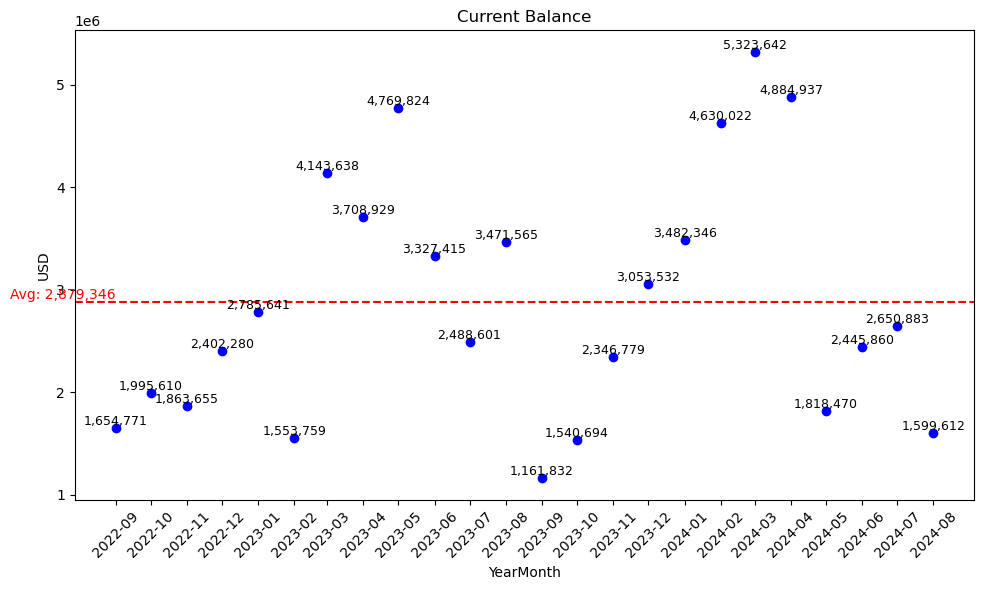

In [30]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_cur_balance['year_month_date'], df_cur_balance['current_balance'], color='blue')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('USD')
plt.title('Current Balance')

# Rotate x-axis labels for better readability (optional)

x_labels = df_cur_balance['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_cur_balance['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (current_balance)
for i, value in enumerate(df_cur_balance['current_balance']):
    plt.text(df_cur_balance['year_month_date'][i], df_cur_balance['current_balance'][i], 
             f'{value:,.0f}', ha='center', va='bottom', fontsize=9)


plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_cur_balance['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [32]:
###without normalization, no trend, or seasonality

In [33]:
#### Average Balance

In [34]:
df_cur_balance_avg=df.groupby('year_month_date')[['current_balance']].mean().reset_index().copy()

In [35]:
df_average = df_cur_balance_avg['current_balance'].mean()

In [36]:
df_average

1388.8823015117314

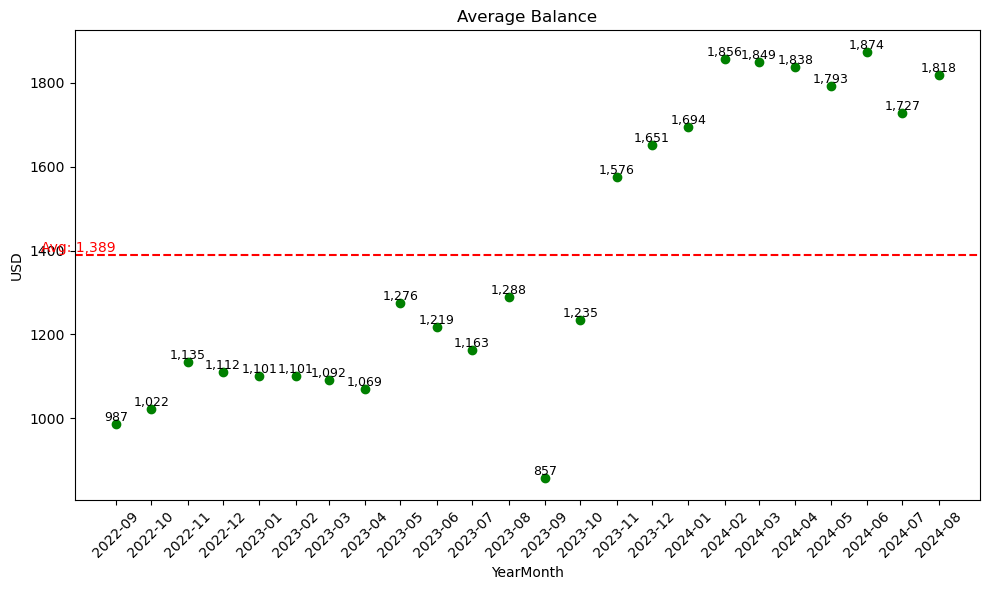

In [49]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_cur_balance_avg['year_month_date'], df_cur_balance_avg['current_balance'], color='green')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('USD')
plt.title('Average Balance')

# Rotate x-axis labels for better readability (optional)

x_labels = df_cur_balance_avg['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_cur_balance_avg['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (current_balance)
for i, value in enumerate(df_cur_balance_avg['current_balance']):
    plt.text(df_cur_balance_avg['year_month_date'][i], df_cur_balance_avg['current_balance'][i], 
             f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_cur_balance_avg['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [51]:
#increase in average value of tickets. Outlier in Sep 2023.

In [53]:
####DPD
df_dpd=df.groupby('year_month_date')[['dpd']].mean().reset_index().copy()


In [55]:
df_average = df_dpd['dpd'].mean()

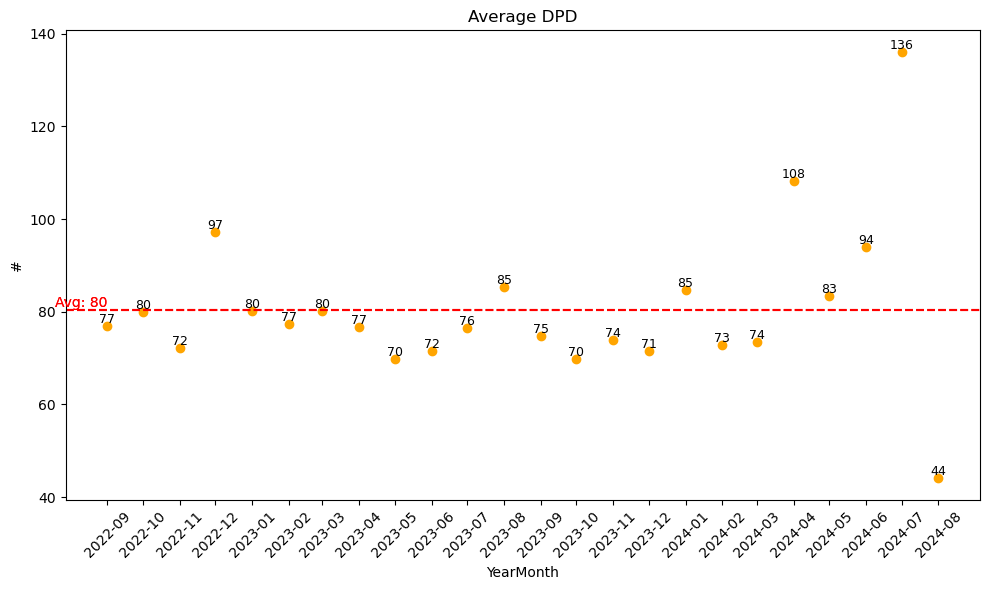

In [57]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_dpd['year_month_date'], df_dpd['dpd'], color='orange')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('#')
plt.title('Average DPD')

# Rotate x-axis labels for better readability (optional)

x_labels = df_dpd['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_dpd['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (dpd)
for i, value in enumerate(df_dpd['dpd']):
    plt.text(df_dpd['year_month_date'][i], df_dpd['dpd'][i], 
             f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_dpd['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_dpd['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [59]:
###Around average, besides last months

In [61]:
###DCA PLacement

In [63]:

df_dca=df.groupby('year_month_date')[['dca_placement']].mean().reset_index().copy()

In [65]:
df_average = df_dca['dca_placement'].mean()

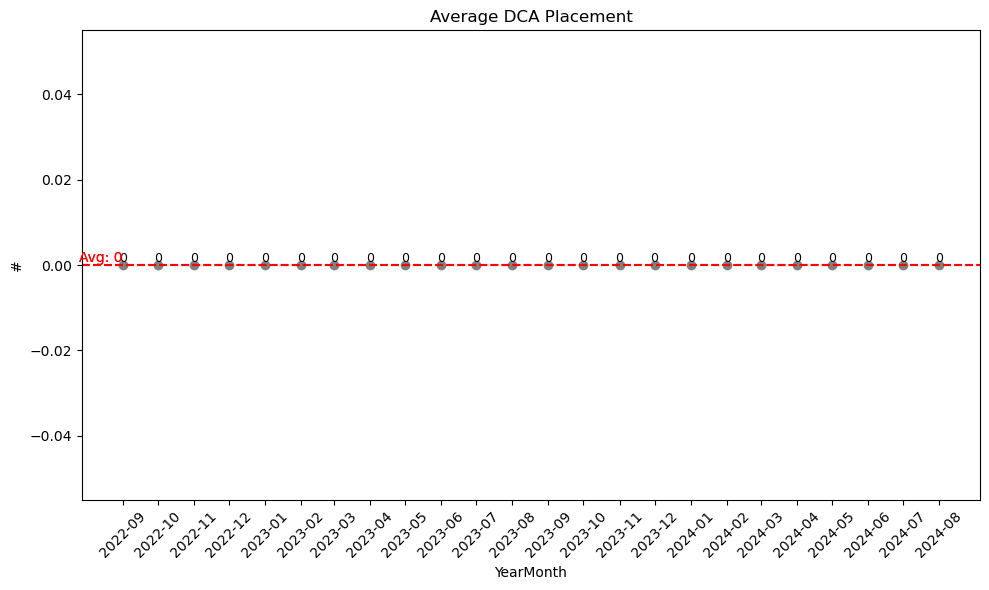

In [67]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_dca['year_month_date'], df_dca['dca_placement'], color='gray')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('#')
plt.title('Average DCA Placement')

# Rotate x-axis labels for better readability (optional)

x_labels = df_dca['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_dca['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (dca_placement)
for i, value in enumerate(df_dca['dca_placement']):
    plt.text(df_dca['year_month_date'][i], df_dca['dca_placement'][i], 
             f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_dca['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_dca['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [69]:
###zero

In [71]:
### Amount of accounts

In [73]:
df_accounts=df.groupby('year_month_date')[['ak_id']].count().reset_index().copy()

In [75]:
df_average = df_accounts['ak_id'].mean()

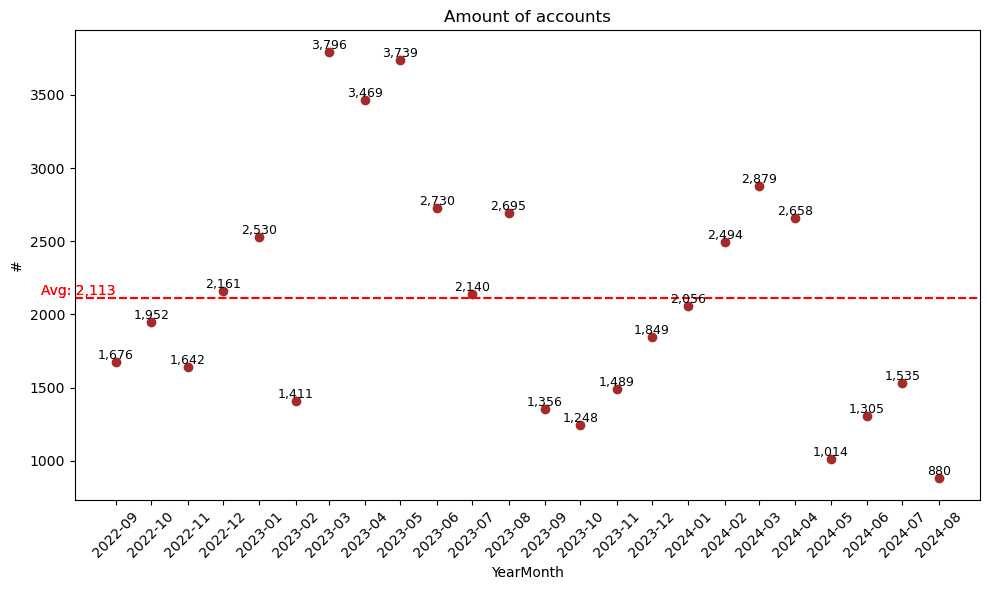

In [77]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_accounts['year_month_date'], df_accounts['ak_id'], color='brown')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('#')
plt.title('Amount of accounts')

# Rotate x-axis labels for better readability (optional)

x_labels = df_accounts['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_accounts['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (ak_id)
for i, value in enumerate(df_accounts['ak_id']):
    plt.text(df_accounts['year_month_date'][i], df_accounts['ak_id'][i], 
             f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_accounts['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_accounts['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [79]:
# last months less accounts

In [81]:
#### paid last 12 months

In [83]:
df_paid=df.groupby('year_month_date')[['paid_last_12_months']].sum().reset_index().copy()

In [85]:
df_paid=pd.merge(df_paid,df_accounts,how='left',on='year_month_date')

In [87]:
df_paid['weight']=df_paid['paid_last_12_months']/df_paid['ak_id']

In [89]:
df_paid

,year_month_date,paid_last_12_months,ak_id,weight
0,2022-09-01,0,1676,0.0
1,2022-10-01,0,1952,0.0
2,2022-11-01,0,1642,0.0
3,2022-12-01,0,2161,0.0
4,2023-01-01,2524,2530,0.997628
5,2023-02-01,1403,1411,0.99433
6,2023-03-01,3789,3796,0.998156
7,2023-04-01,2838,3469,0.818103
8,2023-05-01,3027,3739,0.809575
9,2023-06-01,2266,2730,0.830037


In [ ]:
####phone_flag

In [95]:
df_phone_flag=df.groupby('year_month_date')[['phone_flag']].sum().reset_index().copy()

In [99]:
df_phone_flag=pd.merge(df_phone_flag,df_accounts,how='left',on='year_month_date')

In [101]:
df_phone_flag['weight']=df_phone_flag['phone_flag']/df_phone_flag['ak_id']

In [105]:
df_average = df_phone_flag['weight'].mean()

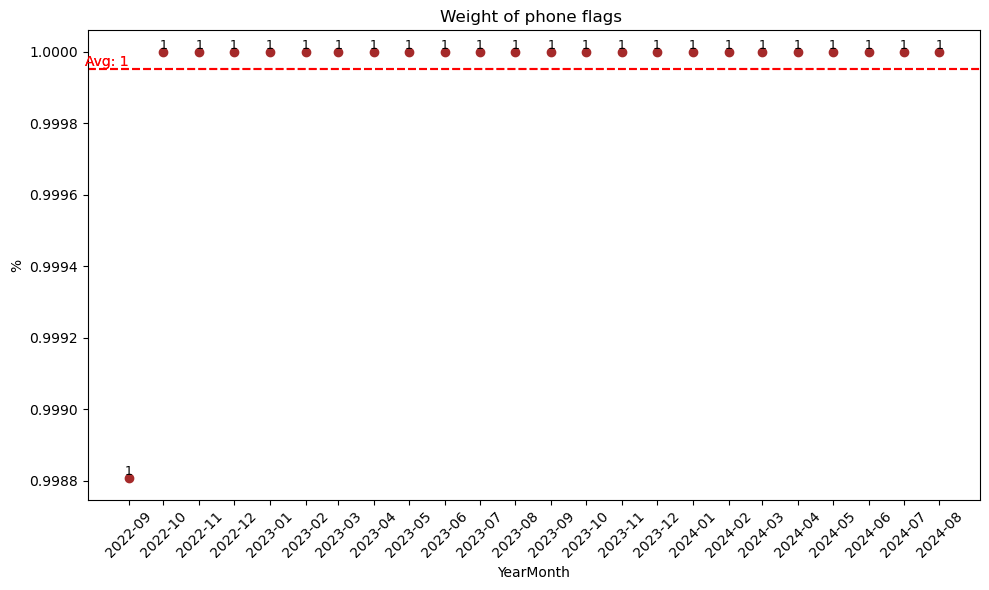

In [111]:
plt.figure(figsize=(10, 6))  # Make the figure wider
plt.scatter(df_phone_flag['year_month_date'], df_phone_flag['weight'], color='brown')

# Add labels and title
plt.xlabel('YearMonth')
plt.ylabel('%')
plt.title('Weight of phone flags ')

# Rotate x-axis labels for better readability (optional)

x_labels = df_phone_flag['year_month_date'].dt.strftime('%Y-%m-%d')  # Format as string
short_x_labels = x_labels.str.slice(0, 7)  # Get the first 6 letters

plt.xticks(df_phone_flag['year_month_date'], short_x_labels, rotation=45)


# Annotate each point with its y-value (weight)
for i, value in enumerate(df_phone_flag['weight']):
    plt.text(df_accounts['year_month_date'][i], df_phone_flag['weight'][i], 
             f'{value:,.0f}', ha='center', va='bottom', fontsize=9)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_accounts['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

plt.axhline(y=df_average, color='red', linestyle='--', label=f'Average DPD: {df_average:,.0f}')

plt.text(df_accounts['year_month_date'].min(), df_average, f'Avg: {df_average:,.0f}', 
         color='red', va='bottom', ha='right', fontsize=10)

# Show plot
plt.tight_layout()  # To make sure labels are not cut off
plt.show()

In [119]:
df_phone_valid=df.groupby('year_month_date')[['phone_val']].sum().reset_index().copy()

In [121]:
df_phone_valid=pd.merge(df_phone_valid,df_accounts,how='left',on='year_month_date')

In [123]:
df_phone_valid['weight']=df_phone_valid['phone_val']/df_phone_valid['ak_id']

In [125]:
df_average = df_phone_valid['weight'].mean()

In [127]:
df_average

0.908481091944509

In [129]:
df_phone_valid

,year_month_date,phone_val,ak_id,weight
0,2022-09-01,0,1676,0.0
1,2022-10-01,1944,1952,0.995902
2,2022-11-01,1641,1642,0.999391
3,2022-12-01,2148,2161,0.993984
4,2023-01-01,0,2530,0.0
5,2023-02-01,1407,1411,0.997165
6,2023-03-01,3793,3796,0.99921
7,2023-04-01,3462,3469,0.997982
8,2023-05-01,3737,3739,0.999465
9,2023-06-01,2724,2730,0.997802


In [ ]:
#######################################################

In [131]:
df_email_flag=df.groupby('year_month_date')[['email_flag']].sum().reset_index().copy()

In [133]:
df_email_flag

,year_month_date,email_flag
0,2022-09-01,1675
1,2022-10-01,1952
2,2022-11-01,1642
3,2022-12-01,2161
4,2023-01-01,2530
5,2023-02-01,1411
6,2023-03-01,3796
7,2023-04-01,3469
8,2023-05-01,3739
9,2023-06-01,2730


In [135]:
df_email_val=df.groupby('year_month_date')[['email_val']].sum().reset_index().copy()

In [137]:
df_email_val

,year_month_date,email_val
0,2022-09-01,0
1,2022-10-01,1929
2,2022-11-01,1618
3,2022-12-01,2130
4,2023-01-01,2497
5,2023-02-01,1396
6,2023-03-01,3758
7,2023-04-01,3420
8,2023-05-01,3698
9,2023-06-01,2702
